<a href="https://colab.research.google.com/github/mdarshad1000/BeeHappy-Microsoft-Engage-22/blob/master/Netflix_Movie_Length_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netfllix Movie Length Analysis

## 1. Loading the data from a CSV

The data that we are loading is in a CSV format which isn't organized and difficult is difficult to read.

Therefore we read the CSV file as a  DataFrame which is easier to inspect.

In [1]:
from google.colab import files 
uploaded = files.upload()

Saving netflix_data.csv to netflix_data.csv


In [2]:
# Importing Pandas under its conventional alias
import pandas as pd

# Read CSV as a Dataframe
netflix_df = pd.read_csv('netflix_data.csv')

## 2. Overview of the data
We will try to get an overview of the data by inspecting the first and last few rows. 

Also, we will try to get an outline of the data by getting through the missing values, name of columns etcetera.

In [3]:
print(netflix_df)

     show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Boni

In [4]:
# First five rows
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [5]:
# Last five rows
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,1,Dessert wizard Adriano Zumbo looks for the nex...,International TV
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,United Kingdom,"March 1, 2020",2019,90,This documentary delves into the mystique behi...,Documentaries


In [6]:
# Missing values in each column
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
duration           0
description        0
genre              0
dtype: int64

In [7]:
# Name of columns
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

## 3. Filtering the Movies
To find if or null hypothesis stands correct or not, we will start with scatching a surface to move towards our objective

In [8]:
# Extracting only movies from the data
netflix_movie_df = netflix_df[netflix_df['type'] == 'Movie'] 

# Selecting only the columns of interest
netflix_movies_subset_df = netflix_movie_df.loc[:, ['title', 'country', 'genre', 'release_year', 'duration']]

# The new dataset
netflix_movies_subset_df.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


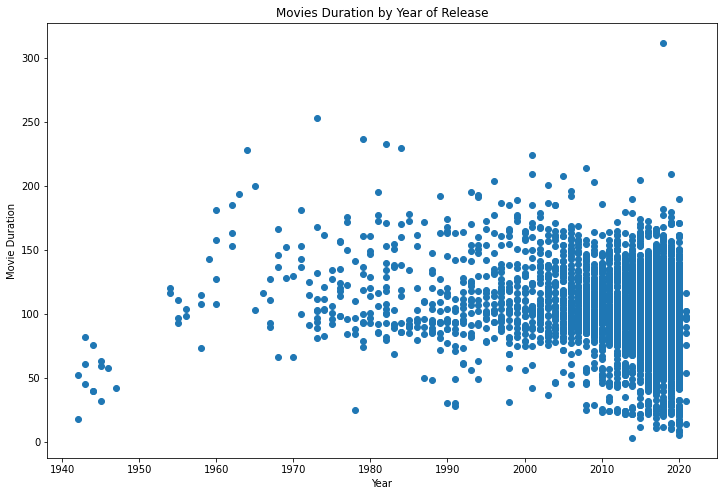

In [9]:
# Importing dependency to make figures
import matplotlib.pyplot as plt

# Create a figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
_ = plt.scatter(netflix_movies_subset_df['release_year'], netflix_movies_subset_df['duration'])
_ = plt.title('Movies Duration by Year of Release')
_ = plt.xlabel('Year')
_ = plt.ylabel('Movie Duration')
# Display the Plot
_ = plt.show()

## 4. Digging deeper
From the plot we can see that a lot of movies of shorter duration were released majorly in the last decade or so. Also that newer movies are published more on the platform compared to the old ones. 

On further analysis, we can see that a decent amount of movies are as short as being under 1 hour. Let's filter our DataFrame for movies with a duration under 60 minutes and look at the genres. This might give us an understanding on what exactly is dragging down the average.

In [10]:
# Movies shroter than 1 hour
short_movies = netflix_movies_subset_df[netflix_movies_subset_df['duration']<60]

# Print the first few enteries of the short movie DataFrame
print(short_movies.head(30))

# Print the last few enteries of the short movie DataFrame
print(short_movies.head(30))

                                                 title         country  \
35                                           #Rucker50   United States   
55                 100 Things to do Before High School   United States   
67   13TH: A Conversation with Oprah Winfrey & Ava ...             NaN   
101                                  3 Seconds Divorce          Canada   
146                                     A 3 Minute Hug          Mexico   
162  A Christmas Special: Miraculous: Tales of Lady...          France   
171                         A Family Reunion Christmas   United States   
177                    A Go! Go! Cory Carson Christmas   United States   
178                    A Go! Go! Cory Carson Halloween             NaN   
179                  A Go! Go! Cory Carson Summer Camp             NaN   
181             A Grand Night In: The Story of Aardman  United Kingdom   
200                            A Love Song for Latasha   United States   
220                         A Russell 

## 5. 
It is interesting to find out that many movies which are under 60 minutes long fall under the genre "Children", "Stand-Up", and "Documentaries".

No we can plot these values separately to get insights 

In [10]:
I